In [5]:
import matplotlib.pyplot as plt
import matplotlib.finance as mpf

In [ ]:
def candlechart(ohlc, width=0.8):
    """入力されたデータフレームに対してローソク足チャートを返す
        引数:
            * ohlc:
                *データフレーム
                * 列名に'open'", 'close', 'low', 'high'を入れること
                * 順不同"
            * widrh: ローソクの線幅
        戻り値: ax: subplot"""
    fig, ax = plt.subplots()
    # ローソク足
    fin.candlestick2_ohlc(ax, opens=ohlc.open.values, closes=ohlc.close.values,
                          lows=ohlc.low.values, highs=ohlc.high.values,
                          width=width, colorup='r', colordown='b')

    # x軸を時間にする
    xdate = ohlc.index
    ax.xaxis.set_major_locator(ticker.MaxNLocator(6))

    def mydate(x, pos):
        try:
            return xdate[int(x)]
        except IndexError:
            return ''

    # ax.xaxis.set_major_formatter(ticker.FuncFormatter(mydate))
    ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')

    fig.autofmt_xdate()
    fig.tight_layout()

    return fig, ax


In [6]:
from randomwalk import *

In [7]:
df = randomwalk(60*24*30, freq='T', tick=0.01).resample('B').ohlc() + 115
df.head()

,open,high,low,close
2017-03-14,114.99,115.32,114.97,115.31
2017-03-15,115.30,115.49,115.03,115.46
2017-03-16,115.45,116.12,115.44,115.95
2017-03-17,115.95,116.24,115.67,116.18
2017-03-20,116.18,116.45,115.98,116.16


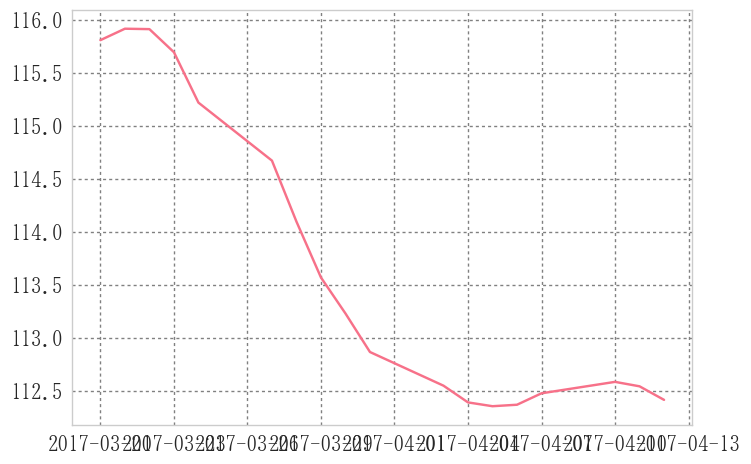

In [11]:
# 参考: http://qiita.com/toyolab/items/1b5d11b5d376bd542022

fig = plt.figure()
ax = plt.subplot()

ohlc = np.vstack((range(len(df)), df.values.T)).T #x軸データを整数に
mpf.candlestick_ohlc(ax, ohlc, width=0.8, colorup='r', colordown='b')

xtick0 = (5-df.index[0].weekday())%5 #最初の月曜日のインデックス
plt.xticks(range(xtick0,len(df),5), [x.strftime('%Y-%m-%d') for x in df.index][xtick0::5])
ax.grid(True) #グリッド表示
ax.set_xlim(-1, len(df)) #x軸の範囲
fig.autofmt_xdate() #x軸のオートフォーマット

sma5 = df.close.rolling(5).mean()
ax.plot(sma5)

In [54]:
ts = pd.date_range('20160901', '20161011')
date2num(ts)

AttributeError: 'numpy.datetime64' object has no attribute 'toordinal'